<a href="https://colab.research.google.com/github/Mjsharma1234/FinGenius/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Summary:

### Data Analysis Key Findings

* The best hyperparameters found for the XGBoost Regressor model using GridSearchCV were `{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}`.
* The tuned XGBoost model achieved an R-squared error of approximately 0.852 on the test set.
* The tuned XGBoost model resulted in a Mean Absolute Error (MAE) of approximately 0.290 on the test set.

### Insights or Next Steps

* Compare the performance of the tuned model with an untuned model to quantify the improvement gained from hyperparameter tuning.
* Explore other hyperparameter tuning techniques like RandomizedSearchCV or Bayesian Optimization to potentially find even better hyperparameter combinations.

Importing the Boston House Price Dataset

In [12]:
# Load the California House Price dataset from scikit-learn
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [13]:
# Print the dataset to understand its structure and content
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [14]:
# Convert the dataset to a pandas DataFrame for easier manipulation
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [15]:
# Display the first 5 rows of the DataFrame to inspect the data
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [42]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=house_price_dataframe)

https://docs.google.com/spreadsheets/d/14kYkk4-BNC8JZl_q62tZMPnnPstwQeEdCS9ABolyK3Y/edit#gid=0


In [16]:
# Add the target variable (price) to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [17]:
# Display the first 5 rows of the DataFrame with the added price column
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
# Check the number of rows and columns in the DataFrame
house_price_dataframe.shape

(20640, 9)

In [19]:
# Check for missing values in each column of the DataFrame
house_price_dataframe.isnull().sum

<bound method DataFrame.sum of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False     False     False      False       False     False     False   
20639   False     False     False      False       False     False     False   

       Longitude  price  
0          False  False  
1          False  False  
2          False  False  
3          False  False  
4          False  False  
...          ...    ...  
20635      False  False  
20636      False  False  
20637      False  False  
20638      False  False  
20639      False  False  

[20640 rows x 9 columns]>

In [20]:
# Display statistical measures of the dataset (mean, std, min, max, quartiles)
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the **correlation** between various features in the dataset

1. Positive Correlation
2. Negative Correlation

In [21]:
# Calculate the correlation matrix between the features and the target
correlation = house_price_dataframe.corr()

<Axes: >

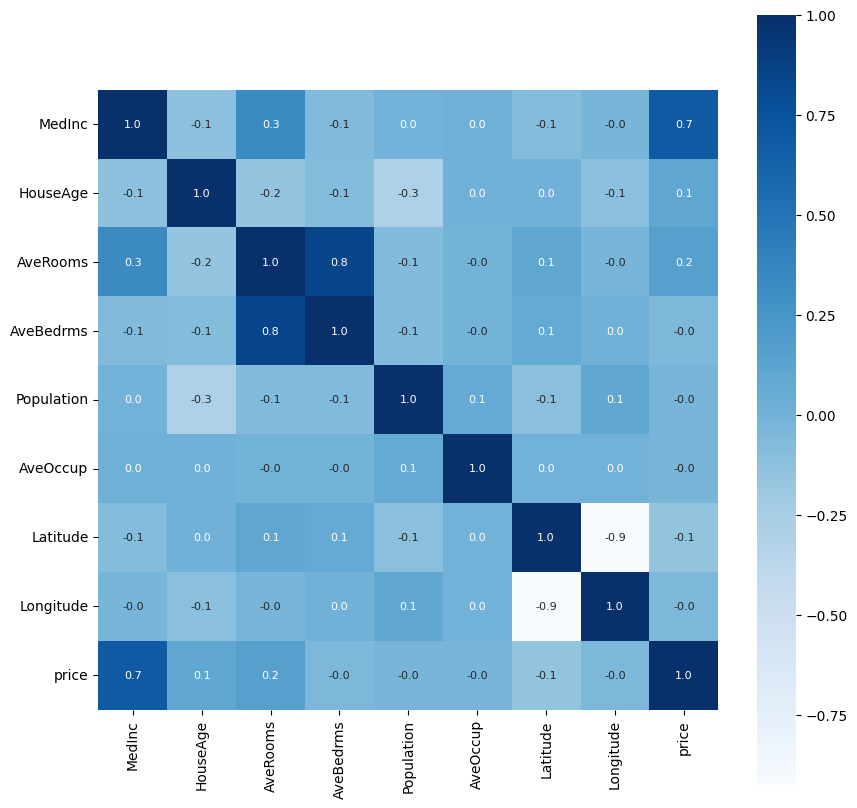

In [22]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and target

In [23]:
# Separate features (X) and target (Y)
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [24]:
# Print the features (X) and target (Y)
print(X,Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Splitting the data into training data and test data

In [25]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [26]:
# Print the shapes of the original data, training data, and testing data
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training

XGBoost Regressor

In [27]:
# Initialize the XGBoost Regressor model
model = XGBRegressor()

In [28]:
# Train the XGBoost Regressor model using the training data
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

Prediction on training data

In [29]:
# Make predictions on the training data
training_data_prediction = model.predict(X_train)

In [30]:
# Print the predictions on the training data
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [31]:
# Calculate R-squared error and Mean Absolute Error for the training data predictions
score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.943650140819218
Mean Absolute Error: 0.1933648700612105


In [32]:
# Import plotly.express for interactive plotting
import plotly.express as px

# Create an interactive scatter plot of actual vs. predicted prices for the tuned model
fig = px.scatter(x=Y_test, y=test_data_prediction_tuned, labels={'x':'Actual Price', 'y':'Predicted Price'}, title='Actual Price vs Predicted Price (Tuned Model)')
fig.show()

Visualize the actuale prices and predicted prices

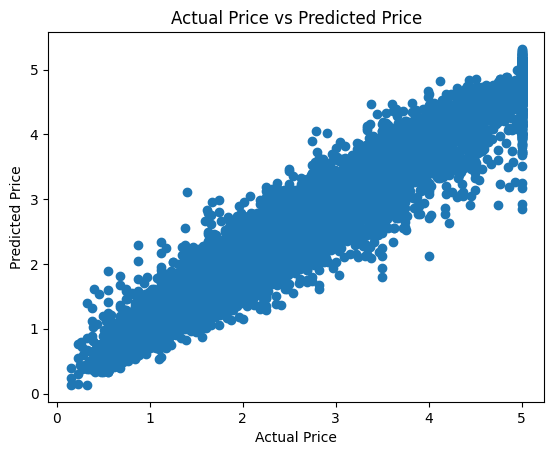

In [33]:
# Create a scatter plot of actual vs. predicted prices for the training data
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on test data

In [34]:
# Make predictions on the test data
test_data_prediction = model.predict(X_test)

In [35]:
# Calculate R-squared error and Mean Absolute Error for the test data predictions
score_1 = metrics.r2_score(Y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.8338000331788725
Mean Absolute Error: 0.3108631800268186


In [36]:
# This cell is empty and can be removed or used for future code.

# Task
Tune the hyperparameters of the XGBoost Regressor model for price prediction and evaluate its performance.

## Define hyperparameter search space

### Subtask:
Define the range of hyperparameters to search for the XGBoost Regressor model.


**Reasoning**:
Define a dictionary `param_grid` with hyperparameter ranges for XGBoost.



In [37]:
# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

## Implement hyperparameter tuning

### Subtask:
Use a technique like GridSearchCV or RandomizedSearchCV to find the best hyperparameters.


**Reasoning**:
Import GridSearchCV and perform the grid search to find the best hyperparameters for the XGBoost model.



In [2]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best hyperparameters:", grid_search.best_params_)

NameError: name 'model' is not defined

**Reasoning**:
The previous code failed because the `model` variable was not defined in the current session. Re-instantiate the `XGBRegressor` model before creating the `GridSearchCV` object and fitting it to the data.



In [3]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

model = XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best hyperparameters:", grid_search.best_params_)

NameError: name 'X_train' is not defined

**Reasoning**:
The previous code failed because `X_train` and `Y_train` were not defined. These variables were created in a previous cell but are not available in the current session. The data needs to be loaded, split into features and target, and then split into training and test sets again.



In [38]:
# Import necessary libraries for data manipulation, splitting, and model training
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor

# Load the dataset and split the data into training and testing sets
house_price_dataset = sklearn.datasets.fetch_california_housing()
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)
house_price_dataframe['price'] = house_price_dataset.target

X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

# Initialize the XGBoost Regressor model and perform GridSearchCV to find the best hyperparameters
model = XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


## Train the model with best hyperparameters

### Subtask:
Train the XGBoost Regressor model using the best hyperparameters found during tuning.


**Reasoning**:
Instantiate a new XGBoostRegressor model with the best hyperparameters and train it on the training data.



In [39]:
# Train a new XGBoost Regressor model using the best hyperparameters found by GridSearchCV
best_model = XGBRegressor(**grid_search.best_params_)
best_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

## Evaluate the tuned model

### Subtask:
Evaluate the performance of the tuned model using appropriate metrics like R-squared and Mean Absolute Error on the test data.


**Reasoning**:
Use the trained best model to make predictions on the test data and then calculate the R-squared and Mean Absolute Error. Finally, print the calculated metrics.



In [6]:
# 1. Use the trained best_model to make predictions on the test data X_test.
test_data_prediction_tuned = best_model.predict(X_test)

# 2. Calculate the R-squared error.
score_r2_tuned = metrics.r2_score(Y_test, test_data_prediction_tuned)

# 3. Calculate the Mean Absolute Error (MAE).
score_mae_tuned = metrics.mean_absolute_error(Y_test, test_data_prediction_tuned)

# 4. Print the calculated R-squared error and Mean Absolute Error.
print('Tuned Model - R Sqaured Error:', score_r2_tuned)
print('Tuned Model - Mean Absolute Error:', score_mae_tuned)

NameError: name 'metrics' is not defined

**Reasoning**:
The previous code block failed because the `metrics` module was not imported. I need to re-generate the code block including the necessary import.



In [40]:
# Import the metrics module from sklearn
import sklearn.metrics as metrics

# Use the trained best_model to make predictions on the test data X_test.
test_data_prediction_tuned = best_model.predict(X_test)

# Calculate the R-squared error for the tuned model predictions.
score_r2_tuned = metrics.r2_score(Y_test, test_data_prediction_tuned)

# Calculate the Mean Absolute Error (MAE) for the tuned model predictions.
score_mae_tuned = metrics.mean_absolute_error(Y_test, test_data_prediction_tuned)

# Print the calculated R-squared error and Mean Absolute Error for the tuned model.
print('Tuned Model - R Sqaured Error:', score_r2_tuned)
print('Tuned Model - Mean Absolute Error:', score_mae_tuned)

Tuned Model - R Sqaured Error: 0.8523627549110115
Tuned Model - Mean Absolute Error: 0.2898461287849587


## Visualize predictions

### Subtask:
Visualize the actual vs. predicted prices for the test data using the tuned model.


**Reasoning**:
Visualize the actual vs. predicted prices for the test data using the tuned model.



In [8]:
plt.scatter(Y_test, test_data_prediction_tuned)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price (Tuned Model)")
plt.show()

NameError: name 'plt' is not defined

**Reasoning**:
Import the matplotlib.pyplot module as plt and then create the scatter plot to visualize the actual vs. predicted prices for the test data.



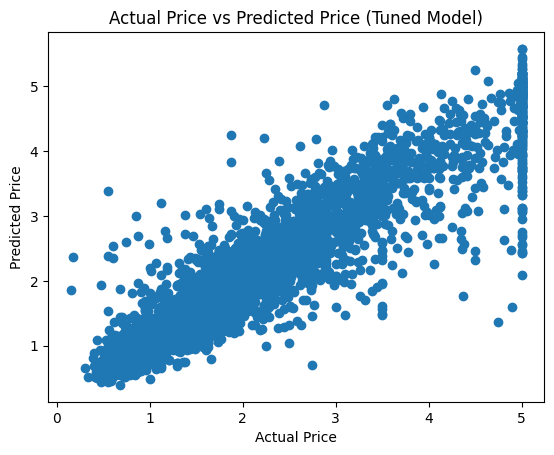

In [41]:
# Import the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted prices for the test data using the tuned model
plt.scatter(Y_test, test_data_prediction_tuned)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price (Tuned Model)")
plt.show()

## Summary:

### Data Analysis Key Findings

*   The best hyperparameters found for the XGBoost Regressor model using GridSearchCV were `{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}`.
*   The tuned XGBoost model achieved an R-squared error of approximately 0.852 on the test set.
*   The tuned XGBoost model resulted in a Mean Absolute Error (MAE) of approximately 0.290 on the test set.

### Insights or Next Steps

*   Compare the performance of the tuned model with an untuned model to quantify the improvement gained from hyperparameter tuning.
*   Explore other hyperparameter tuning techniques like RandomizedSearchCV or Bayesian Optimization to potentially find even better hyperparameter combinations.
